In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [8]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/reward-rule/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)
    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [9]:
num_epochs = 10000
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,neural_recording_sparsity,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,jobid,log_interval,num_blocks,log_expdata
0,0.000013,-0.000995,-1.008475e-05,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
1,0.000013,0.001412,-1.008475e-05,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
2,0.000013,-0.003834,-1.008475e-05,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
3,0.000013,-0.007598,-1.008475e-05,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
4,0.000013,-0.010622,-1.008475e-05,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.071148,-0.087833,3.719089e-07,0.000016,0.000056,0.000007,0.000149,-0.000190,2.838189e-07,0.000090,...,1.0,1,0.1,0.005,10,18,9,100,3,True
296,0.071062,-0.088071,3.719089e-07,-0.000125,-0.000126,0.000007,0.000100,-0.000193,2.838189e-07,0.000141,...,1.0,1,0.1,0.005,10,18,9,100,3,True
297,0.070976,-0.088224,3.719089e-07,0.000172,-0.000071,0.000007,0.000001,-0.000159,2.838189e-07,0.000215,...,1.0,1,0.1,0.005,10,18,9,100,3,True
298,0.071029,-0.087926,3.719089e-07,0.000186,-0.000002,0.000007,0.000074,-0.000093,2.838189e-07,0.000360,...,1.0,1,0.1,0.005,10,18,9,100,3,True


In [10]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'use_experimental_data', 'neural_recording_sparsity', 'input_firing_mean', 'input_noise', 'l1_regularization', 'moving_avg_window', 'trainable_coeffs', 'jobid', 'log_interval', 'num_blocks', 'log_expdata']


In [11]:
df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [12]:
np.sort(df["jobid"].unique())
# df.dtypes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [13]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & ((df['trainable_coeffs'] == 2) | (df['trainable_coeffs'] == 5) | (df['trainable_coeffs'] == 18))]
num_exps = len(df_subset)
df_subset.head(5)

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,neural_recording_sparsity,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,jobid,log_interval,num_blocks,log_expdata
49,0.000013,-0.067108,-0.000010,-0.000003,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.000010,...,1.0,1,0.1,0.005,10,2,1,100,3,True
149,-0.020717,-0.089843,-0.000010,0.128198,-0.000014,-0.000016,0.000008,0.000005,-7.643724e-07,0.037042,...,1.0,1,0.1,0.005,10,5,1,100,3,True
249,0.000002,-0.183207,-0.000010,-0.000014,0.091155,-0.000016,-0.000005,0.091151,-7.643724e-07,0.136762,...,1.0,1,0.1,0.005,10,18,1,100,3,True
49,0.000010,-0.048978,0.000008,-0.000017,0.000014,-0.000002,0.000009,0.000008,-1.883750e-05,-0.000030,...,1.0,1,0.1,0.005,10,2,10,100,3,True
149,0.000038,-0.050109,0.000008,-0.000033,0.000014,-0.000002,0.000009,0.000008,-1.883750e-05,0.008450,...,1.0,1,0.1,0.005,10,5,10,100,3,True


In [14]:
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)

In [15]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,use_experimental_data,neural_recording_sparsity,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,jobid,log_interval,num_blocks,log_expdata,coeff_name,coeff_val
0,4900,0.518891,0.947405,1,10000,80,False,1.0,1,0.1,0.005,10,2,1,100,3,True,A_000,0.000013
1,4900,0.516822,0.958326,1,10000,80,False,1.0,1,0.1,0.005,10,5,1,100,3,True,A_000,-0.020717
2,4900,0.515477,0.792431,1,10000,80,False,1.0,1,0.1,0.005,10,18,1,100,3,True,A_000,0.000002
3,4900,0.646634,0.536623,1,10000,80,False,1.0,1,0.1,0.005,10,2,10,100,3,True,A_000,0.000010
4,4900,0.646625,0.507135,1,10000,80,False,1.0,1,0.1,0.005,10,5,10,100,3,True,A_000,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,4900,0.656852,0.304421,1,10000,80,False,1.0,1,0.1,0.005,10,5,8,100,3,True,A_221,-0.000009
968,4900,0.656625,0.394307,1,10000,80,False,1.0,1,0.1,0.005,10,18,8,100,3,True,A_221,0.000029
969,4900,0.528765,0.934237,1,10000,80,False,1.0,1,0.1,0.005,10,2,9,100,3,True,A_221,0.000002
970,4900,0.528147,0.929667,1,10000,80,False,1.0,1,0.1,0.005,10,5,9,100,3,True,A_221,0.000002


<Figure size 432x288 with 0 Axes>

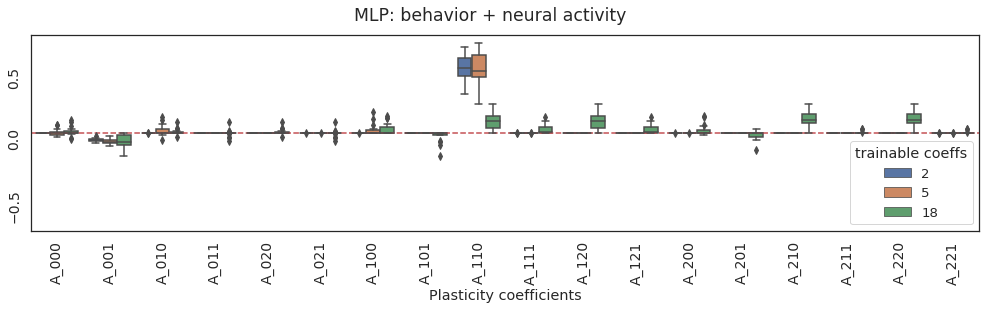

In [18]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(17, 4), width_ratios=[6])

fig.suptitle('MLP: behavior + neural activity', fontsize="large")

axes.axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="trainable_coeffs", ax=axes)
axes.set_xlabel("Plasticity coefficients")
axes.set_ylabel(None)
axes.set_ylim([-0.8, 0.8])
axes.tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
axes.legend(title='trainable coeffs')

# axes[1].set_title('Final Loss')
# sns.boxplot(data=df_subset, x="neural_recording_sparsity", y="loss", hue="neural_recording_sparsity", width=0.4, ax=axes[1])
# axes[1].set_xlabel("neural_recording_sparsity")
# axes[1].set_ylabel(None)
# axes[1].set_ylim([0.50, 0.7])

# axes[1].get_legend().remove()
fig.subplots_adjust(bottom=0.2)

plt.savefig(f"imgs/reward-rule.png", dpi=500)

In [80]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & (df['neural_recording_sparsity'] == 1.)]
num_exps = len(df_subset)
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)
        
df_subset.head(5)

,A_000,A_001,A_010,A_011,A_020,A_021,A_100,A_101,A_110,A_111,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
49,-0.007115,-0.007701,0.000050,-0.000125,-0.000053,0.000027,-0.000258,0.000058,0.243075,-0.000025,...,3,True,False,1.0,1,1,0.1,0.005,10,18
99,-0.009692,0.080737,-0.000135,0.000004,-0.000564,-0.000052,-0.000132,0.000416,0.135965,-0.000157,...,3,True,False,1.0,10,1,0.1,0.005,10,18
99,-0.000049,-0.004610,-0.000051,-0.000126,-0.000016,-0.000077,0.000003,-0.000043,0.584684,-0.000091,...,3,True,False,1.0,11,1,0.1,0.005,10,18
99,-0.000381,0.072447,0.000132,0.000124,0.000283,-0.000173,-0.000068,0.000005,0.149364,-0.000099,...,3,True,False,1.0,12,1,0.1,0.005,10,18
49,0.004244,0.002862,0.000083,-0.000097,0.000088,0.000044,-0.000134,-0.008001,0.488860,-0.000121,...,3,True,False,1.0,13,1,0.1,0.005,10,18


In [81]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
0,4900,0.004803,0.281507,1,5000,80,100,3,True,False,1.0,1,1,0.1,0.005,10,18,A_000,-0.007115
1,4900,0.011432,-67.493865,1,5000,80,100,3,True,False,1.0,10,1,0.1,0.005,10,18,A_000,-0.009692
2,4900,0.006591,0.482610,1,5000,80,100,3,True,False,1.0,11,1,0.1,0.005,10,18,A_000,-0.000049
3,4900,0.004705,-2.580993,1,5000,80,100,3,True,False,1.0,12,1,0.1,0.005,10,18,A_000,-0.000381
4,4900,0.005277,0.057200,1,5000,80,100,3,True,False,1.0,13,1,0.1,0.005,10,18,A_000,0.004244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,4900,0.005160,0.750457,1,5000,80,100,3,True,False,1.0,5,1,0.1,0.005,10,18,A_221,-0.000031
302,4900,0.004805,-0.219855,1,5000,80,100,3,True,False,1.0,6,1,0.1,0.005,10,18,A_221,0.000276
303,4900,0.005883,0.676547,1,5000,80,100,3,True,False,1.0,7,1,0.1,0.005,10,18,A_221,0.000070
304,4900,0.004759,0.387030,1,5000,80,100,3,True,False,1.0,8,1,0.1,0.005,10,18,A_221,0.000115


<Figure size 432x288 with 0 Axes>

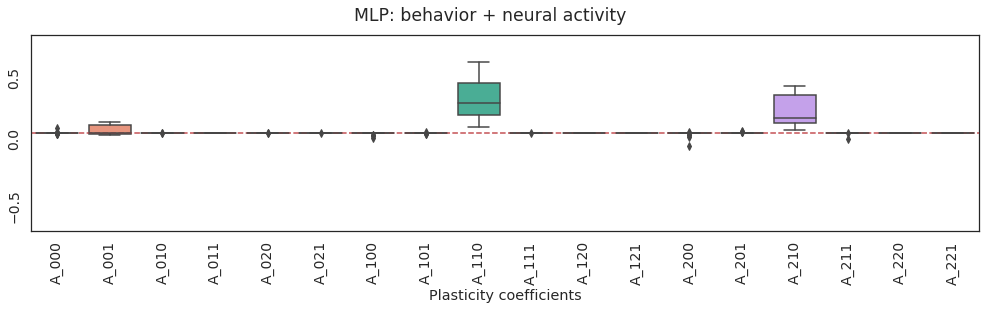

In [83]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(17, 4), width_ratios=[6])

fig.suptitle('MLP: behavior + neural activity', fontsize="large")

axes.axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", ax=axes)
axes.set_xlabel("Plasticity coefficients")
axes.set_ylabel(None)
axes.set_ylim([-0.8, 0.8])
axes.tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
# axes.legend(title='sparsity of neural recording')

fig.subplots_adjust(bottom=0.2)

plt.savefig(f"imgs/mlp-neural-behavior.png", dpi=500)